# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# I am checking the length of cities because I want to analyze at least 500 cities . . .
# so if the len of cities is less than 500 I will rerun this code 
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Before looping through the cities I am going to set up the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Units = imperial gives the temperature in farenheit
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

In [5]:
#Create empty lists and initialize variables
temp = []
humid = []
cloudiness =[]
ws = []
country = []
lat = []
lon = []
found_cities =[]

# Loop through the list of cities and perform a request for data on each
# Not every city is in the Open Weather API so I am preparing for the possibility of an error
for x in range(len(cities)):
    try:
        response = requests.get(query_url + cities[x]).json()
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        print(f"FOUND IN API: City Number {x} Name {cities[x]}")
    except KeyError:
        print(f"NOT FOUND IN API: City Number {x} Name {cities[x]}")

FOUND IN API: City Number 0 Name barrow
FOUND IN API: City Number 1 Name provideniya
FOUND IN API: City Number 2 Name waingapu
FOUND IN API: City Number 3 Name verkhnevilyuysk
FOUND IN API: City Number 4 Name hobart
NOT FOUND IN API: City Number 5 Name taolanaro
FOUND IN API: City Number 6 Name avarua
FOUND IN API: City Number 7 Name ushuaia
FOUND IN API: City Number 8 Name bintulu
FOUND IN API: City Number 9 Name olafsvik
NOT FOUND IN API: City Number 10 Name belushya guba
FOUND IN API: City Number 11 Name georgetown
FOUND IN API: City Number 12 Name flinders
FOUND IN API: City Number 13 Name kasongo-lunda
FOUND IN API: City Number 14 Name lebu
FOUND IN API: City Number 15 Name chokurdakh
FOUND IN API: City Number 16 Name hamilton
FOUND IN API: City Number 17 Name betsiamites
FOUND IN API: City Number 18 Name atuona
FOUND IN API: City Number 19 Name qaanaaq
FOUND IN API: City Number 20 Name tambovka
FOUND IN API: City Number 21 Name lata
FOUND IN API: City Number 22 Name arlit
FOUND I

FOUND IN API: City Number 188 Name sinnamary
FOUND IN API: City Number 189 Name manggar
FOUND IN API: City Number 190 Name mount isa
FOUND IN API: City Number 191 Name omboue
NOT FOUND IN API: City Number 192 Name barentsburg
FOUND IN API: City Number 193 Name maunabo
FOUND IN API: City Number 194 Name petropavlovsk-kamchatskiy
FOUND IN API: City Number 195 Name new norfolk
FOUND IN API: City Number 196 Name rio bueno
NOT FOUND IN API: City Number 197 Name buqayq
FOUND IN API: City Number 198 Name mount pleasant
FOUND IN API: City Number 199 Name ahuacatlan
FOUND IN API: City Number 200 Name jiupu
FOUND IN API: City Number 201 Name muroto
FOUND IN API: City Number 202 Name faya
FOUND IN API: City Number 203 Name domoni
FOUND IN API: City Number 204 Name saint anthony
FOUND IN API: City Number 205 Name fushe-kruje
FOUND IN API: City Number 206 Name gallipoli
FOUND IN API: City Number 207 Name balkanabat
FOUND IN API: City Number 208 Name deloraine
FOUND IN API: City Number 209 Name pakx

FOUND IN API: City Number 371 Name miedzyrzecz
FOUND IN API: City Number 372 Name mayor pablo lagerenza
FOUND IN API: City Number 373 Name sisimiut
FOUND IN API: City Number 374 Name tadine
FOUND IN API: City Number 375 Name haines junction
FOUND IN API: City Number 376 Name turukhansk
FOUND IN API: City Number 377 Name saint-pierre
FOUND IN API: City Number 378 Name chengde
FOUND IN API: City Number 379 Name ventspils
FOUND IN API: City Number 380 Name tautira
FOUND IN API: City Number 381 Name mombetsu
NOT FOUND IN API: City Number 382 Name vaitupu
FOUND IN API: City Number 383 Name novopokrovka
FOUND IN API: City Number 384 Name port elizabeth
FOUND IN API: City Number 385 Name esperance
FOUND IN API: City Number 386 Name vilhena
FOUND IN API: City Number 387 Name homer
FOUND IN API: City Number 388 Name groesbeek
FOUND IN API: City Number 389 Name bayan
FOUND IN API: City Number 390 Name carauari
FOUND IN API: City Number 391 Name khowst
FOUND IN API: City Number 392 Name la sarre


FOUND IN API: City Number 555 Name voyvozh
FOUND IN API: City Number 556 Name hohhot
FOUND IN API: City Number 557 Name hosakote
FOUND IN API: City Number 558 Name sorland
FOUND IN API: City Number 559 Name kununurra
FOUND IN API: City Number 560 Name bekobod
FOUND IN API: City Number 561 Name alamosa
FOUND IN API: City Number 562 Name pirovskoye
FOUND IN API: City Number 563 Name gorontalo
FOUND IN API: City Number 564 Name pandan
FOUND IN API: City Number 565 Name nyurba
FOUND IN API: City Number 566 Name juruti
FOUND IN API: City Number 567 Name buciumi
FOUND IN API: City Number 568 Name avera
FOUND IN API: City Number 569 Name mahebourg
FOUND IN API: City Number 570 Name yaan
FOUND IN API: City Number 571 Name port said
FOUND IN API: City Number 572 Name komsomolskiy
FOUND IN API: City Number 573 Name adre
FOUND IN API: City Number 574 Name college
FOUND IN API: City Number 575 Name bonga
FOUND IN API: City Number 576 Name caltagirone
FOUND IN API: City Number 577 Name grand gaube


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#This is to check that the data has at least 500 cities
print(len(found_cities))

# Create an index list
index_list = []
for x in range(len(found_cities)):
    index_list = []

597


In [10]:
# Create dataframe with the data read in from the API
city_weather_df = pd.DataFrame(index_list)
city_weather_df["City"] = found_cities
city_weather_df["Latitude"] = lat
city_weather_df["Longitude"] = lon
city_weather_df["Country"] = country
city_weather_df["Temperature (F)"] = temp
city_weather_df["Humidity %"] = humid
city_weather_df["Cloudiness %"] = cloudiness
city_weather_df["Wind Speed (mph)"] = ws

# Write dataframe to a csv file 
city_weather_df.to_csv("output_data/cities.csv", header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Remove all rows in dataframe where Humididty is over 100%
city_weather_df = city_weather_df.loc[city_weather_df["Humidity %"]<100,:]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

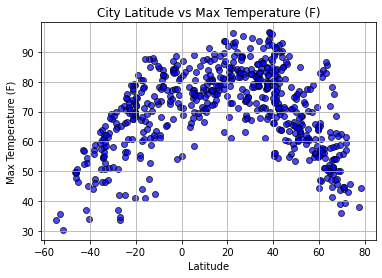

In [21]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature (F)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

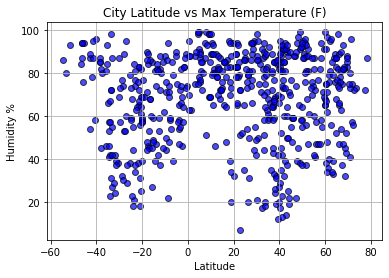

In [22]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Humidity%.png")
plt.show()

## Latitude vs. Cloudiness Plot

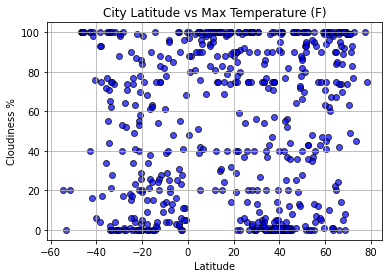

In [23]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness %"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_Cloudiness%.png")
plt.show()

## Latitude vs. Wind Speed Plot

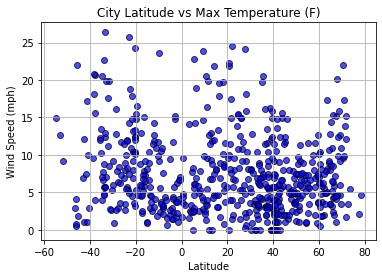

In [24]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed (mph)"], marker="o", facecolors="blue", edgecolors="black", alpha =0.7)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (F)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save as png
plt.savefig("output_data/Lat_vs_WindSpeed(mph).png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression